## Combine Multiple Datasets into One

In many cases, the data needed for the statistical analyses come from different sources. For example, if you want to analyze international growth, you might find economic indicators in a dataset of the World Bank, political indicators in think tanks such as Freedom House, and climate data in another dataset. Another case is when you have one dataset which is divided into multiple files. In this post I will try to elaborate a bit on how to make it work.

### Types of Datasets Combinations

There are actually two main types of combinations:

#### ```"Vertical"``` combination: 

You want to do this when you want to add observations from one file to another file. 

Another possibility is that the data is separated according to different leagues, groups, etc. As long as the variables in the files are the same and the only thing you need to do is to add observations, this is vertical combination. The command in Stata we will use is append. We will explore this command later.

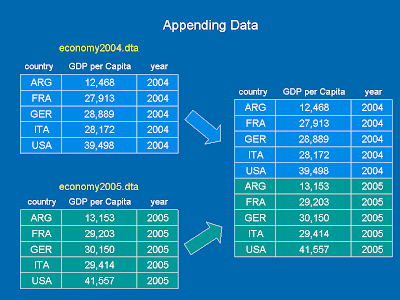

#### ```"Horizontal"``` combination:

This is the kind of combinations in which you want to add variables, and not observations. The observations appear in both files (at least most of them), but in each file there is different information about them. 

If we have an identifying variable in both files (e.g Social Security Number), we can assign each student his/her SAT score. This example is a One-to-One matching. There are three types of matches of this kind:

#### One-to-One matching: 

If the identifying variable which appears in the files is unique in both files, then it's a one-to-one match. Unique means that for each value of this variable, there is only one observation that contains it. In the figure below, country is the identifying variable. In both datasets, each country has only one observation.

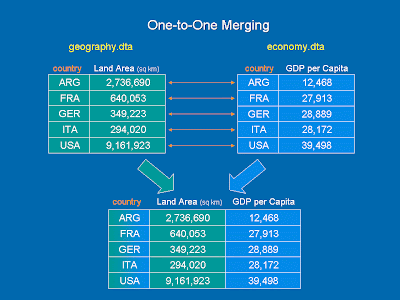

#### One-to-Many matching: 

If the identifying variable is unique in one file, but not unique in the other, then it's a one-to-many matching. This is very common when you have groups of observations in one file (the file with the identifying variable which is not unique), and information regarding each group in another file (the other file). The following figure will make it clearer:

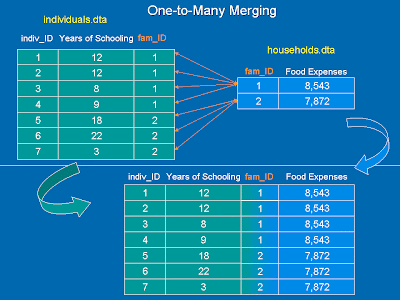

#### Many-to-Many matching: 

This is very rare. This is also problematic, since there is no unambiguous rule for the assignment of values from observations in one file to observations in the other file. I will not elaborate on this matching too much.

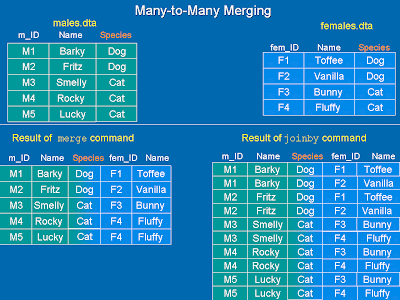

### Merging DataFrames

>**“Merging”** two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns.

The words ```“merge”``` and ```“join”``` are used relatively interchangeably in Pandas and other languages, namely SQL and R. In Pandas, there are separate ```“merge”``` and ```“join”``` functions, both of which do similar things.

### Inner, Left, and right merge types

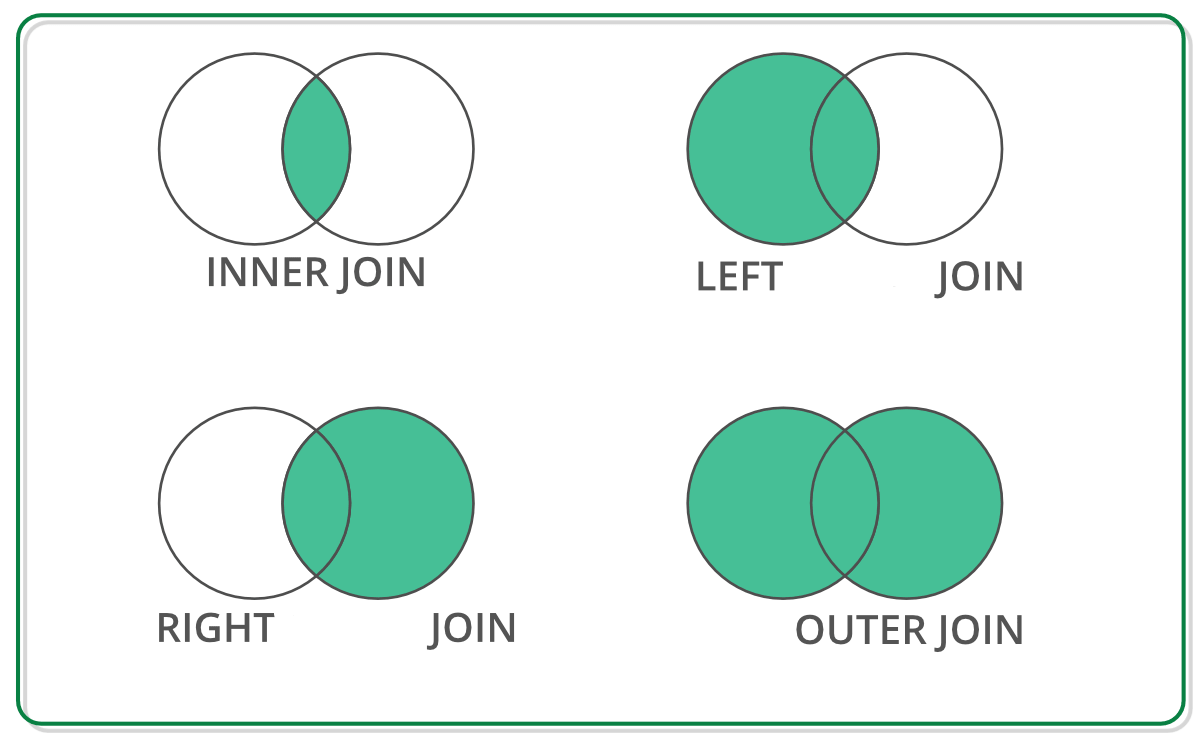

In our example above, we merged user_usage with user_devices. The head() preview of the result looks great, but there’s more to this than meets the eye. First, let’s look at the sizes or shapes of our inputs and outputs to the merge command:

## Merge and Join DataFrames in Pandas

In any real world data science situation with Python, you’ll be about 10 minutes in when you’ll need to merge or join Pandas Dataframes together to form your analysis dataset. Merging and joining dataframes is a core process that any aspiring data analyst will need to master. This blog post addresses the process of merging datasets, that is, joining two datasets together based on common columns between them.

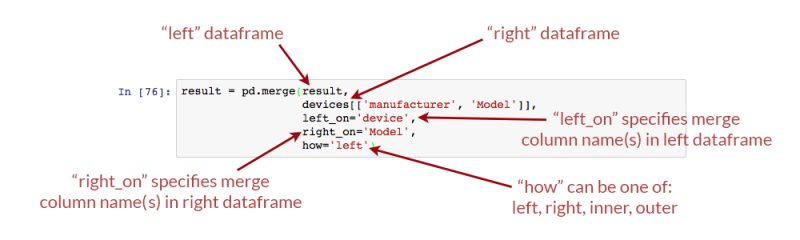

In [2]:
import pandas as pd

df1 = pd.DataFrame({'user_id': ['id001', 'id002', 'id003', 'id004', 'id005', 'id006', 'id007'],
                    'first_name': ['Rivi', 'Wynnie', 'Kristos', 'Madalyn', 'Tobe', 'Regan', 'Kristin'],
                    'last_name': ['Valti', 'McMurty', 'Ivanets', 'Max', 'Riddich', 'Huyghe', 'Illis'],
                    'email': ['rvalti0@example.com', 'wmcmurty1@example.com', 'kivanets2@example.com',
                              'mmax3@example.com', 'triddich4@example.com', 'rhuyghe@example.com', 'killis4@example.com']
                    })
print(df1)
print("--------------------------------------------------------------------")
df2 = pd.DataFrame({'user_id': ['id001', 'id002', 'id003', 'id004', 'id005'],
                    'image_url': ['http://example.com/img/id001.png', 'http://example.com/img/id002.jpg',
                                  'http://example.com/img/id003.bmp', 'http://example.com/img/id004.jpg',
                                  'http://example.com/img/id005.png']
                    })
print(df2)

  user_id first_name last_name                  email
0   id001       Rivi     Valti    rvalti0@example.com
1   id002     Wynnie   McMurty  wmcmurty1@example.com
2   id003    Kristos   Ivanets  kivanets2@example.com
3   id004    Madalyn       Max      mmax3@example.com
4   id005       Tobe   Riddich  triddich4@example.com
5   id006      Regan    Huyghe    rhuyghe@example.com
6   id007    Kristin     Illis    killis4@example.com
--------------------------------------------------------------------
  user_id                         image_url
0   id001  http://example.com/img/id001.png
1   id002  http://example.com/img/id002.jpg
2   id003  http://example.com/img/id003.bmp
3   id004  http://example.com/img/id004.jpg
4   id005  http://example.com/img/id005.png


In [4]:
# Default merge (Inner Join)
combined_cols = pd.merge(df1,df2)
combined_cols

,user_id,first_name,last_name,email,image_url
0,id001,Rivi,Valti,rvalti0@example.com,http://example.com/img/id001.png
1,id002,Wynnie,McMurty,wmcmurty1@example.com,http://example.com/img/id002.jpg
2,id003,Kristos,Ivanets,kivanets2@example.com,http://example.com/img/id003.bmp
3,id004,Madalyn,Max,mmax3@example.com,http://example.com/img/id004.jpg
4,id005,Tobe,Riddich,triddich4@example.com,http://example.com/img/id005.png


In [5]:
# Inner Join

combined_cols = pd.merge(df1,df2, how='inner', on='user_id')
combined_cols

,user_id,first_name,last_name,email,image_url
0,id001,Rivi,Valti,rvalti0@example.com,http://example.com/img/id001.png
1,id002,Wynnie,McMurty,wmcmurty1@example.com,http://example.com/img/id002.jpg
2,id003,Kristos,Ivanets,kivanets2@example.com,http://example.com/img/id003.bmp
3,id004,Madalyn,Max,mmax3@example.com,http://example.com/img/id004.jpg
4,id005,Tobe,Riddich,triddich4@example.com,http://example.com/img/id005.png


In [6]:
# Left Join

combined_cols = pd.merge(df1,df2, how='left', on='user_id')
combined_cols

,user_id,first_name,last_name,email,image_url
0,id001,Rivi,Valti,rvalti0@example.com,http://example.com/img/id001.png
1,id002,Wynnie,McMurty,wmcmurty1@example.com,http://example.com/img/id002.jpg
2,id003,Kristos,Ivanets,kivanets2@example.com,http://example.com/img/id003.bmp
3,id004,Madalyn,Max,mmax3@example.com,http://example.com/img/id004.jpg
4,id005,Tobe,Riddich,triddich4@example.com,http://example.com/img/id005.png
5,id006,Regan,Huyghe,rhuyghe@example.com,NaN
6,id007,Kristin,Illis,killis4@example.com,NaN


In [7]:
# Right Join

combined_cols = pd.merge(df1,df2, how='right', on='user_id')
combined_cols

,user_id,first_name,last_name,email,image_url
0,id001,Rivi,Valti,rvalti0@example.com,http://example.com/img/id001.png
1,id002,Wynnie,McMurty,wmcmurty1@example.com,http://example.com/img/id002.jpg
2,id003,Kristos,Ivanets,kivanets2@example.com,http://example.com/img/id003.bmp
3,id004,Madalyn,Max,mmax3@example.com,http://example.com/img/id004.jpg
4,id005,Tobe,Riddich,triddich4@example.com,http://example.com/img/id005.png


In [8]:
# Outer/full Join

combined_cols = pd.merge(df1,df2, how='left', on='user_id')
combined_cols

,user_id,first_name,last_name,email,image_url
0,id001,Rivi,Valti,rvalti0@example.com,http://example.com/img/id001.png
1,id002,Wynnie,McMurty,wmcmurty1@example.com,http://example.com/img/id002.jpg
2,id003,Kristos,Ivanets,kivanets2@example.com,http://example.com/img/id003.bmp
3,id004,Madalyn,Max,mmax3@example.com,http://example.com/img/id004.jpg
4,id005,Tobe,Riddich,triddich4@example.com,http://example.com/img/id005.png
5,id006,Regan,Huyghe,rhuyghe@example.com,NaN
6,id007,Kristin,Illis,killis4@example.com,NaN


### Merging when common column has different names

In [9]:
df1 = pd.DataFrame({'user_id': ['id001', 'id002', 'id003', 'id004', 'id005', 'id006', 'id007'],
                    'first_name': ['Rivi', 'Wynnie', 'Kristos', 'Madalyn', 'Tobe', 'Regan', 'Kristin'],
                    'last_name': ['Valti', 'McMurty', 'Ivanets', 'Max', 'Riddich', 'Huyghe', 'Illis'],
                    'email': ['rvalti0@example.com', 'wmcmurty1@example.com', 'kivanets2@example.com',
                              'mmax3@example.com', 'triddich4@example.com', 'rhuyghe@example.com', 'killis4@example.com']
                    })
print(df1)
print("--------------------------------------------------------------------")
df2 = pd.DataFrame({'userid': ['id001', 'id002', 'id003', 'id004', 'id005'],
                    'image_url': ['http://example.com/img/id001.png', 'http://example.com/img/id002.jpg',
                                  'http://example.com/img/id003.bmp', 'http://example.com/img/id004.jpg',
                                  'http://example.com/img/id005.png']
                    })
print(df2)

  user_id first_name last_name                  email
0   id001       Rivi     Valti    rvalti0@example.com
1   id002     Wynnie   McMurty  wmcmurty1@example.com
2   id003    Kristos   Ivanets  kivanets2@example.com
3   id004    Madalyn       Max      mmax3@example.com
4   id005       Tobe   Riddich  triddich4@example.com
5   id006      Regan    Huyghe    rhuyghe@example.com
6   id007    Kristin     Illis    killis4@example.com
--------------------------------------------------------------------
  userid                         image_url
0  id001  http://example.com/img/id001.png
1  id002  http://example.com/img/id002.jpg
2  id003  http://example.com/img/id003.bmp
3  id004  http://example.com/img/id004.jpg
4  id005  http://example.com/img/id005.png


In [12]:
comb = pd.merge(df1,df2, left_on='user_id', right_on='userid')
comb

,user_id,first_name,last_name,email,userid,image_url
0,id001,Rivi,Valti,rvalti0@example.com,id001,http://example.com/img/id001.png
1,id002,Wynnie,McMurty,wmcmurty1@example.com,id002,http://example.com/img/id002.jpg
2,id003,Kristos,Ivanets,kivanets2@example.com,id003,http://example.com/img/id003.bmp
3,id004,Madalyn,Max,mmax3@example.com,id004,http://example.com/img/id004.jpg
4,id005,Tobe,Riddich,triddich4@example.com,id005,http://example.com/img/id005.png


### Merge DataFrames Using join()

Unlike merge() which is a method of the Pandas instance, join() is a method of the DataFrame itself. This means that we can use it like a static method on the DataFrame: DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False).

The DataFrame we call join() from will be our left DataFrame. The DataFrame in the other argument would be our right DataFrame.


#### Syntax of pandas.DataFrame.join() method:

    DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)


In [9]:
import pandas as pd
technologies = {
    'Courses':["Spark","PySpark","Python","pandas"],
    'Fee' :[20000,25000,22000,30000],
    'Duration':['30days','40days','35days','50days'],
              }
index_labels=['r1','r2','r3','r4']
df1 = pd.DataFrame(technologies,index=index_labels)

technologies2 = {
    'Courses':["Spark","Java","Python","Go"],
    'Discount':[2000,2300,1200,2000]
              }
index_labels2=['r1','r6','r3','r5']
df2 = pd.DataFrame(technologies2,index=index_labels2)

In [10]:

# pandas join 
df3=df1.join(df2, lsuffix="_left", rsuffix="_right")
print(df3)


   Courses_left    Fee Duration Courses_right  Discount
r1        Spark  20000   30days         Spark    2000.0
r2      PySpark  25000   40days           NaN       NaN
r3       Python  22000   35days        Python    1200.0
r4       pandas  30000   50days           NaN       NaN


In [11]:

# pandas Inner join DataFrames
df3=df1.join(df2, lsuffix="_left", rsuffix="_right", how='inner')
print(df3)


   Courses_left    Fee Duration Courses_right  Discount
r1        Spark  20000   30days         Spark      2000
r3       Python  22000   35days        Python      1200


In [12]:

# pandas Right join DataFrames
df3=df1.join(df2, lsuffix="_left", rsuffix="_right", how='right')
print(df3)


   Courses_left      Fee Duration Courses_right  Discount
r1        Spark  20000.0   30days         Spark      2000
r6          NaN      NaN      NaN          Java      2300
r3       Python  22000.0   35days        Python      1200
r5          NaN      NaN      NaN            Go      2000


In [13]:

# pandas outer join DataFrames
df3=df1.join(df2, lsuffix="_left", rsuffix="_right", how='outer')
print(df3)


   Courses_left      Fee Duration Courses_right  Discount
r1        Spark  20000.0   30days         Spark    2000.0
r2      PySpark  25000.0   40days           NaN       NaN
r3       Python  22000.0   35days        Python    1200.0
r4       pandas  30000.0   50days           NaN       NaN
r5          NaN      NaN      NaN            Go    2000.0
r6          NaN      NaN      NaN          Java    2300.0


### Merge DataFrames Using append()

As the official Pandas documentation points, since concat() and append() methods return new copies of DataFrames, overusing these methods can affect the performance of your program.

Append is very useful when you want to merge two DataFrames in row axis only. This means that instead of matching data on their columns, we want a new DataFrame that contains all the rows of 2 DataFrames.

Let's append df2 to df1 and print the results:

df_append = df1.append(df2, ignore_index=True)

print(df_append)

In [1]:

import pandas as pd
df = pd.DataFrame({'Courses': ["Spark","PySpark","Python","pandas"],
                    'Fee' : [20000,25000,22000,24000]})

df1 = pd.DataFrame({'Courses': ["Pandas","Hadoop","Hyperion","Java"],
                    'Fee': [25000,25200,24500,24900]})

# Using DataFrame.append() to concat Two DataFrames
df2 = df.append(df1)
print(df2)


    Courses    Fee
0     Spark  20000
1   PySpark  25000
2    Python  22000
3    pandas  24000
0    Pandas  25000
1    Hadoop  25200
2  Hyperion  24500
3      Java  24900


C:\Users\dell\AppData\Local\Temp\ipykernel_7140\1691550403.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df.append(df1)


In [2]:

# Use DataFrame.append() 
df2 = df.append(df1, ignore_index=True)
print(df2)


    Courses    Fee
0     Spark  20000
1   PySpark  25000
2    Python  22000
3    pandas  24000
4    Pandas  25000
5    Hadoop  25200
6  Hyperion  24500
7      Java  24900


C:\Users\dell\AppData\Local\Temp\ipykernel_7140\4020737992.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df.append(df1, ignore_index=True)


### Merge DataFrames Using concat()

Concatenation is a bit more flexible when compared to merge() and join() as it allows us to combine DataFrames either vertically (row-wise) or horizontally (column-wise).

The trade-off is that any data that doesn't match will be discarded. Here's the full function with the parameters:

    pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
              levels=None, names=None, verify_integrity=False, sort=False, copy=True)

Here are the most commonly used parameters for the concat() function:

- objs is the list of DataFrame objects ([df1, df2, ...]) to be concatenated
- axis defines the direction of the concatenation, 0 for row-wise and 1 for column-wise
- join can either be inner (intersection) or outer (union)
- ignore_index by default set to False which allows the index values to remain as they were in the original DataFrames, can cause duplicate index values. If set to True, it will ignore the original values and re-assign index values in sequential order
- keys allows us to construct a hierarchical index. Think of it as another level of the index that appended on the outer left of the DataFrame that helps us to distinguish indices when values are not unique

In [3]:

import pandas as pd
df = pd.DataFrame({'Courses': ["Spark","PySpark","Python","pandas"],
                    'Fee' : [20000,25000,22000,24000]})

df1 = pd.DataFrame({'Courses': ["Pandas","Hadoop","Hyperion","Java"],
                    'Fee': [25000,25200,24500,24900]})

# Using pandas.concat() to concat two DataFrames
data = [df, df1]
df2 = pd.concat(data)
print(df2)


    Courses    Fee
0     Spark  20000
1   PySpark  25000
2    Python  22000
3    pandas  24000
0    Pandas  25000
1    Hadoop  25200
2  Hyperion  24500
3      Java  24900


In [4]:

# Use pandas.concat() method to ignore_index 
df2 = pd.concat([df, df1], ignore_index=True, sort=False)
print(df2)


    Courses    Fee
0     Spark  20000
1   PySpark  25000
2    Python  22000
3    pandas  24000
4    Pandas  25000
5    Hadoop  25200
6  Hyperion  24500
7      Java  24900


In [5]:

import pandas as pd
df = pd.DataFrame({'Courses':["Spark","PySpark","Python","pandas"],
                      'Fee' :[20000,25000,22000,24000]})
  
df1 = pd.DataFrame({'Duration':['30day','40days','35days','60days'],
                      'Discount':[1000,2300,2500,2000,]}) 

#  Using pandas.concat() to join concat two DataFrames
df2 = pd.concat([df, df1], axis=1, join='inner')
print(df2)


   Courses    Fee Duration  Discount
0    Spark  20000    30day      1000
1  PySpark  25000   40days      2300
2   Python  22000   35days      2500
3   pandas  24000   60days      2000


In [6]:

import pandas as pd
df = pd.DataFrame({'Courses': ["Spark", "PySpark", "Python", "Pandas"],
                    'Fee' : ['20000', '25000', '22000', '24000']}) 
  
df1 = pd.DataFrame({'Courses': ["Unix", "Hadoop", "Hyperion", "Java"],
                    'Fee': ['25000', '25200', '24500', '24900']})
  
df2 = pd.DataFrame({'Duration':['30day','40days','35days','60days','55days'],
                    'Discount':[1000,2300,2500,2000,3000]})
  
# Appending multiple DataFrame
df3 = pd.concat([df, df1, df2])
print(df3)


    Courses    Fee Duration  Discount
0     Spark  20000      NaN       NaN
1   PySpark  25000      NaN       NaN
2    Python  22000      NaN       NaN
3    Pandas  24000      NaN       NaN
0      Unix  25000      NaN       NaN
1    Hadoop  25200      NaN       NaN
2  Hyperion  24500      NaN       NaN
3      Java  24900      NaN       NaN
0       NaN    NaN    30day    1000.0
1       NaN    NaN   40days    2300.0
2       NaN    NaN   35days    2500.0
3       NaN    NaN   60days    2000.0
4       NaN    NaN   55days    3000.0


In [7]:
combined = pd.concat([df,df1], ignore_index = True)
combined_final = pd.concat([combined,df2], axis = 1)
print(combined_final)

    Courses    Fee Duration  Discount
0     Spark  20000    30day    1000.0
1   PySpark  25000   40days    2300.0
2    Python  22000   35days    2500.0
3    Pandas  24000   60days    2000.0
4      Unix  25000   55days    3000.0
5    Hadoop  25200      NaN       NaN
6  Hyperion  24500      NaN       NaN
7      Java  24900      NaN       NaN


In [8]:
combined = pd.concat([df,df1], ignore_index = True)
combined_final = pd.concat([combined,df2], axis = 1, join ='inner')
print(combined_final)

   Courses    Fee Duration  Discount
0    Spark  20000    30day      1000
1  PySpark  25000   40days      2300
2   Python  22000   35days      2500
3   Pandas  24000   60days      2000
4     Unix  25000   55days      3000
